In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix

from sklearn import datasets

%matplotlib inline
pd.set_option("display.max_columns", None)

In [3]:
# load in the data
airbnb = pd.read_csv("filtered_nyc_airbnb_2019.csv")
airbnb = airbnb.dropna()
airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [4]:
# remove boroughs and room types
X = airbnb.iloc[:, [7, 8, 10, 11, 12, 14, 15, 16]]
X.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
5,40.74767,-73.97500,200,3,74,0.59,1,129


In [5]:
# scale the data 
scaler = MinMaxScaler(feature_range=(0, 1))
airbnb_scaled = scaler.fit_transform(X)

In [6]:
# turn the scaled data back to a dataframe
airbnb_scaled = pd.DataFrame(airbnb_scaled, columns = X.columns)
airbnb_scaled.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.346932,0.511921,0.298,0.000000,0.012739,0.003419,0.015337,1.000000
1,0.607918,0.490469,0.450,0.000000,0.070064,0.006326,0.003067,0.972603
2,0.439518,0.535649,0.178,0.000000,0.428344,0.079159,0.000000,0.531507
3,0.718308,0.565324,0.160,0.300000,0.012739,0.001539,0.000000,0.000000
4,0.593287,0.506972,0.400,0.066667,0.116242,0.009916,0.000000,0.353425


In [7]:
# run k-means clustering on the data with number of clusters = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_clusters = kmeans.fit_predict(airbnb_scaled)
kmeans_clusters

array([0, 0, 0, ..., 2, 2, 2])

In [8]:
# add the clusters to the dataset
airbnb["kmeans_clusters"] = kmeans_clusters

In [9]:
# these are the room types we anticipate the clustering algorithm will assign the rooms in
airbnb["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [10]:
first_kmean_cluster_filter = airbnb["kmeans_clusters"] == 0
first_kmean_cluster = airbnb[first_kmean_cluster_filter]
first_kmean_cluster.sample(15)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,kmeans_clusters
98,103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2019-05-18,0.55,2,243,0
5686,6018,4404544,"Beautiful, bright, quiet room w/ private bathroom",22864208,Rustam,Brooklyn,Bushwick,40.69703,-73.93207,Private room,75,2,53,2019-06-17,1.23,1,340,0
25713,26748,21241079,West Village Apartment,57169534,Nals,Manhattan,West Village,40.73261,-74.00713,Entire home/apt,295,2,7,2018-09-28,0.33,1,365,0
871,920,342965,Super Clean Apt by Columbus Circle,1740233,Gladys,Manhattan,Hell's Kitchen,40.76774,-73.98920,Entire home/apt,350,4,24,2017-09-21,0.27,1,362,0
40059,41687,32409168,15 minutes to Times Square!!! Red Lux bedroom,243367528,Lucca & Paula,Queens,Astoria,40.76575,-73.91366,Private room,80,1,21,2019-06-09,4.53,7,313,0
42710,44452,34233430,Contemporary studio in Manhattan,258460961,Elena,Manhattan,Upper East Side,40.77932,-73.94547,Entire home/apt,150,3,4,2019-06-30,1.90,1,315,0
15823,16506,13232952,Happy and spacious corner near 7 train,17638424,Sophie,Queens,Elmhurst,40.74576,-73.87407,Private room,47,1,87,2019-06-04,2.35,8,156,0
21268,22162,17843998,"Large & Sunny, a Lovely 2-Bed Apt in East Village",23089531,Caitlin,Manhattan,East Village,40.72571,-73.98789,Entire home/apt,250,2,8,2019-06-02,0.32,3,264,0
7667,8071,6227027,Bright and Beautiful UWS Treasure!!,6089159,Samantha,Manhattan,Upper West Side,40.78302,-73.98057,Entire home/apt,100,14,3,2019-05-20,0.13,1,205,0
19586,20423,16289203,Huge Bedroom - East Village - NYC,42422050,Paula,Manhattan,East Village,40.72709,-73.97459,Private room,79,2,19,2019-03-16,0.67,2,244,0


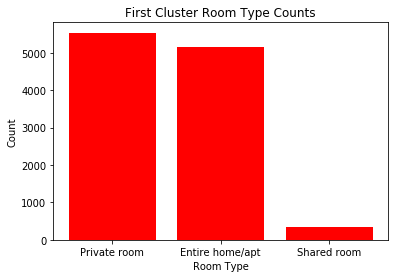

In [10]:
vc = first_kmean_cluster["room_type"].value_counts()
plt.bar(vc.index, vc.values, color = "red")
plt.title("First Cluster Room Type Counts")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.savefig("plots/first_cluster_room_type.png")

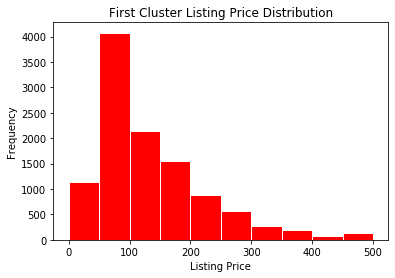

In [11]:
first_kmean_cluster["price"].hist(grid = False, edgecolor = "white", color = "red")
plt.title("First Cluster Listing Price Distribution")
plt.xlabel("Listing Price")
plt.ylabel("Frequency")
plt.savefig("plots/first_cluster_price_dist.png")

In [12]:
second_kmean_cluster_filter = airbnb["kmeans_clusters"] == 1
second_kmean_cluster = airbnb[second_kmean_cluster_filter]
second_kmean_cluster.sample(15)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,kmeans_clusters
37646,39152,30548591,FEMALE SHARED ROOM3 Single Beds Near Subway-3,172369331,Abby,Brooklyn,Coney Island,40.57863,-73.98455,Shared room,29,18,1,2019-02-15,0.21,10,221,1
31788,33053,26074006,Nice & Spacious Manhattan Room Near the Station,137358866,Kazuya,Manhattan,Harlem,40.81217,-73.94406,Private room,52,30,2,2019-06-04,0.19,103,214,1
7890,8299,6384383,Penthouse Triplex/ Union Sq / Roof,1245695,Chris,Manhattan,East Village,40.73249,-73.98870,Private room,200,30,8,2016-10-22,0.16,1,365,1
28675,29813,22938753,Luxury Studio near Central Park - Times Square,4920221,UBliss,Manhattan,Midtown,40.76551,-73.98315,Entire home/apt,189,29,3,2018-10-27,0.27,1,358,1
21441,22336,18025342,"1BR near Mt Sinai, Columbia, Cent Pk. Must See!",6752799,Zach,Manhattan,East Harlem,40.79720,-73.94749,Private room,45,28,1,2017-07-02,0.04,2,147,1
42347,44071,34020040,"Homey, Friendly Apt Share Next To Subway",253836845,Ollie,Brooklyn,Crown Heights,40.67058,-73.95730,Private room,68,30,1,2019-05-21,0.60,7,226,1
13635,14225,11005300,East Village Sanctuary,57107571,Molly,Manhattan,East Village,40.72808,-73.98763,Entire home/apt,200,30,22,2019-06-09,0.65,1,112,1
35066,36441,28976135,1Great Budget Private Room,209298687,Digna,Brooklyn,Bedford-Stuyvesant,40.68937,-73.94992,Private room,65,30,13,2019-05-27,1.45,4,357,1
25592,26621,21175597,Sunny church view room in Harlem brownstone,8637211,Judie And Steven,Manhattan,Harlem,40.81899,-73.94584,Private room,70,30,29,2019-05-28,1.36,4,292,1
23142,24098,19414813,1BR - Heart of West Village - 30 Day Min - Unit 2,4422523,Marie,Manhattan,West Village,40.73392,-74.00354,Entire home/apt,150,30,3,2019-01-24,0.17,6,286,1


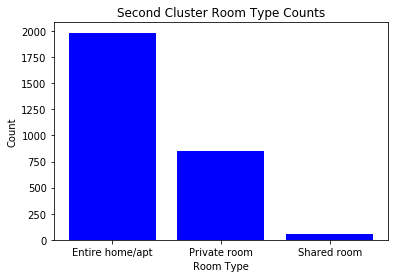

In [13]:
vc = second_kmean_cluster["room_type"].value_counts()
plt.bar(vc.index, vc.values, color = "b")
plt.title("Second Cluster Room Type Counts")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.savefig("plots/second_cluster_room_type.png")

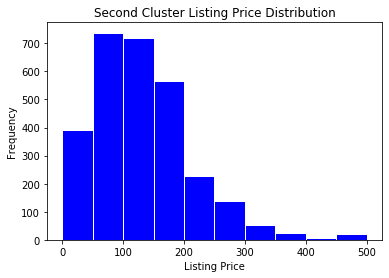

In [14]:
second_kmean_cluster["price"].hist(grid = False, edgecolor = "white", color = "b")
plt.title("Second Cluster Listing Price Distribution")
plt.xlabel("Listing Price")
plt.ylabel("Frequency")
plt.savefig("plots/second_cluster_price_dist.png")

In [15]:
third_kmean_cluster_filter = airbnb["kmeans_clusters"] == 2
third_kmean_cluster = airbnb[third_kmean_cluster_filter]
third_kmean_cluster.sample(15)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,kmeans_clusters
34918,36290,28869774,Light-filled studio in East Williamsburg,19874189,Ali,Brooklyn,Williamsburg,40.71598,-73.94300,Entire home/apt,160,4,6,2019-06-26,0.69,1,10,2
33445,34777,27571163,"Beautiful S Williamsburg 1 Bdrm near G,L,J,M,Z",24862289,Thaddeus,Brooklyn,Williamsburg,40.70865,-73.94631,Entire home/apt,150,4,9,2019-06-30,0.89,1,0,2
33385,34715,27528267,Amazing room & private en-suite bath in Brooklyn!,17518954,Rashmi,Brooklyn,Bedford-Stuyvesant,40.69038,-73.93101,Private room,79,3,44,2019-07-01,4.06,1,91,2
13710,14304,11128811,Cozy Walk up apartment in a great neighborhood!,42779345,Jodi,Queens,Long Island City,40.74523,-73.94906,Private room,50,2,3,2019-02-17,0.41,1,0,2
32079,33355,26356082,Entire Greenpoint / North Williamsburg Gem,1828429,Lola,Brooklyn,Greenpoint,40.72756,-73.95628,Entire home/apt,140,3,1,2019-05-25,0.67,1,36,2
30375,31576,24596296,Cozy Bed-Stuy Getaway!,20633674,Karli,Brooklyn,Bedford-Stuyvesant,40.69199,-73.94426,Private room,46,3,6,2019-03-16,0.72,1,0,2
24951,25962,20730848,Central Park and Museum mile Privarte room 105th.,42783238,Thomas,Manhattan,East Harlem,40.79383,-73.94968,Private room,85,1,98,2018-10-15,4.39,2,0,2
28001,29113,22361604,Brooklyn Palace,163516658,Calisa,Brooklyn,East New York,40.65600,-73.89719,Entire home/apt,80,1,139,2019-06-24,7.65,1,77,2
21247,22141,17824351,"Heart of East Village, Middle of Everything",30381715,Sean,Manhattan,East Village,40.72552,-73.98657,Private room,79,4,1,2017-05-13,0.04,1,0,2
14048,14659,11580884,Cozy Artists Bushwick Loft!,59075666,Das,Brooklyn,Williamsburg,40.70395,-73.93367,Private room,50,6,11,2018-09-07,0.27,1,0,2


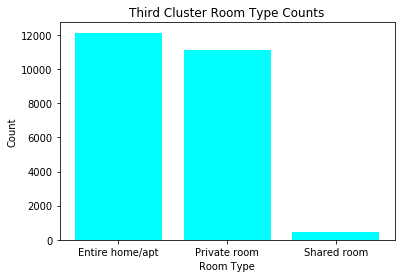

In [16]:
vc = third_kmean_cluster["room_type"].value_counts()
plt.bar(vc.index, vc.values, color = "cyan")
plt.title("Third Cluster Room Type Counts")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.savefig("plots/third_cluster_room_type.png")

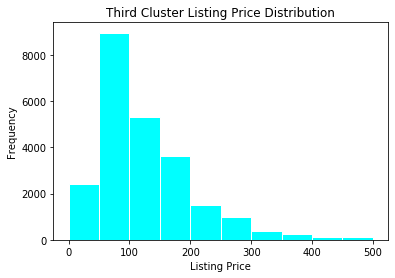

In [17]:
third_kmean_cluster["price"].hist(grid = False, edgecolor = "white", color = "cyan")
plt.title("Third Cluster Listing Price Distribution")
plt.xlabel("Listing Price")
plt.ylabel("Frequency")
plt.savefig("plots/third_cluster_price_dist.png")

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_rotated = pca.transform(X)

In [13]:
X_rotated_df = pd.DataFrame(X_rotated, columns = ["PC1","PC2"])
X_rotated_df["Cluster"] = kmeans_clusters
X_rotated_df.head()

,PC1,PC2,Cluster
0,250.367854,9.146345,0
1,248.094110,83.483953,0
2,98.949172,-53.532644,0
3,-116.661530,-37.915806,2
4,24.476055,70.643985,2


Text(0.5, 1, 'PCA Analysis (k = 3)')

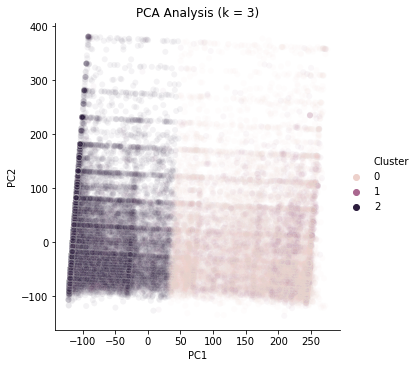

In [14]:
sns.relplot(x = "PC1", y = "PC2", hue = "Cluster", data = X_rotated_df, alpha = 0.05)
plt.title("PCA Analysis (number of clusters = 3)")

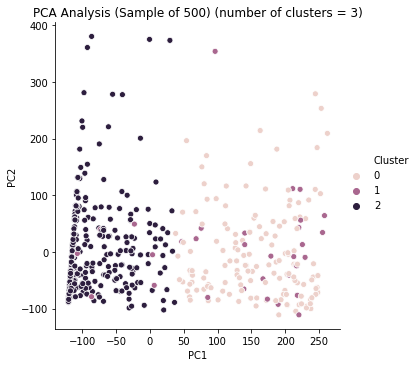

In [16]:
X_rotated_sample = X_rotated_df.sample(500)
sns.relplot(x = "PC1", y = "PC2", hue = "Cluster", data = X_rotated_sample)
plt.title("PCA Analysis (Sample of 500) (number of clusters = 3)")
plt.savefig("plots/pca_3.png")

In [21]:
print("Cluster 1 Size: " + str(len(first_kmean_cluster)))
print("Cluster 2 Size: " + str(len(second_kmean_cluster)))
print("Cluster 3 Size: " + str(len(third_kmean_cluster)))

Cluster 1 Size: 11044
Cluster 2 Size: 2890
Cluster 3 Size: 23655


In [17]:
# run k-means clustering on the data with number of clusters = 2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_clusters = kmeans.fit_predict(airbnb_scaled)
kmeans_clusters

pca = PCA(n_components=2)
pca.fit(X)
X_rotated = pca.transform(X)

X_rotated_df = pd.DataFrame(X_rotated, columns = ["PC1","PC2"])
X_rotated_df["Cluster"] = kmeans_clusters
X_rotated_df.head()

,PC1,PC2,Cluster
0,250.367854,9.146345,1
1,248.094110,83.483953,1
2,98.949172,-53.532644,1
3,-116.661530,-37.915806,0
4,24.476055,70.643985,0


Text(0.5, 1, 'PCA Analysis (number of clusters = 2)')

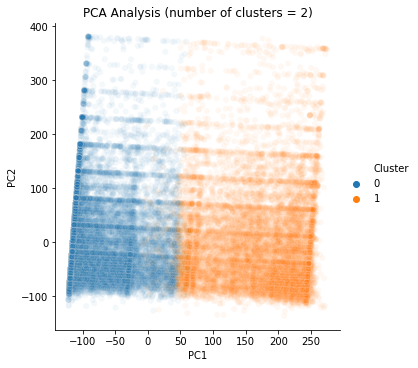

In [18]:
sns.relplot(x = "PC1", y = "PC2", hue = "Cluster", data = X_rotated_df, alpha = 0.05)
plt.title("PCA Analysis (number of clusters = 2)")

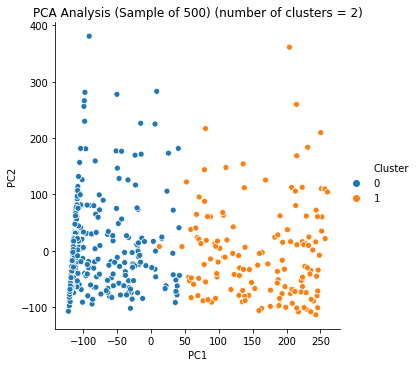

In [20]:
X_rotated_sample = X_rotated_df.sample(500)
sns.relplot(x = "PC1", y = "PC2", hue = "Cluster", data = X_rotated_sample)
plt.title("PCA Analysis (Sample of 500) (number of clusters = 2)")
plt.savefig("plots/pca_2.png")

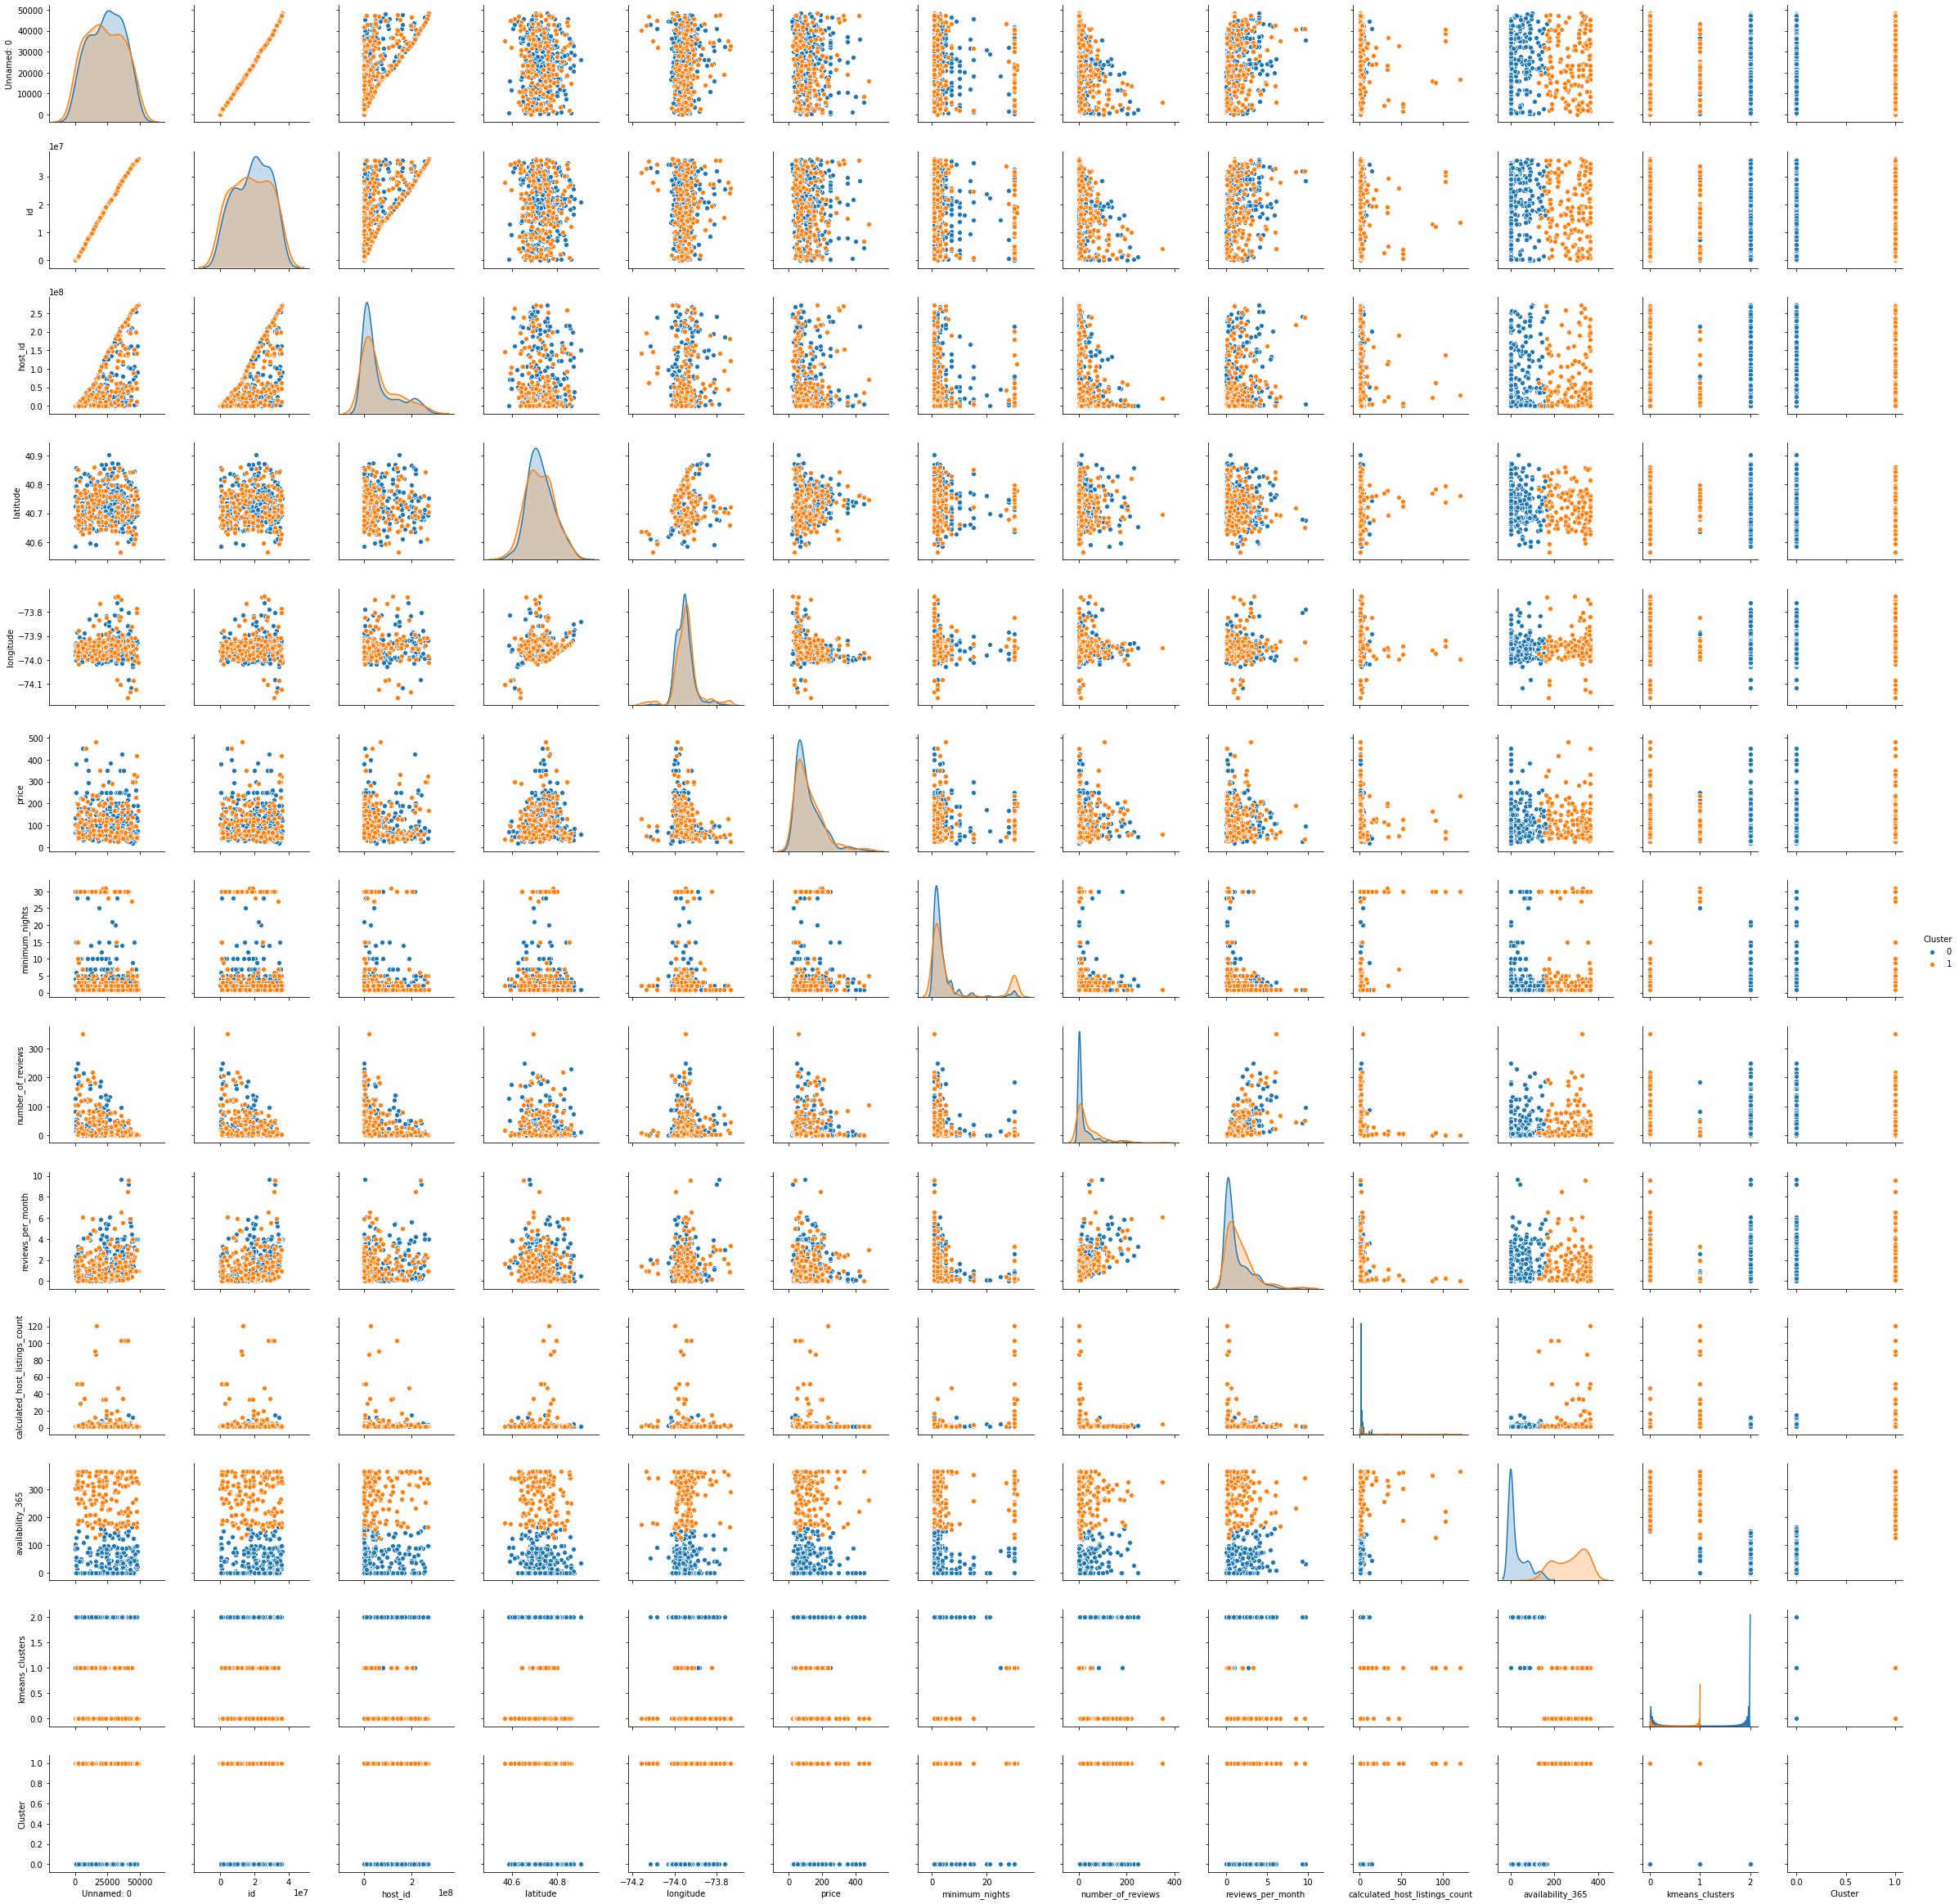

In [28]:
airbnb["Cluster"] = kmeans_clusters
airbnb_sample = airbnb.sample(500)
sns.pairplot(data = airbnb_sample, hue = "Cluster")
plt.savefig("plots/2_clusters_visualization.png")

In [29]:
first_kmean_cluster = kmeans_clusters[kmeans_clusters == 0]
second_kmean_cluster = kmeans_clusters[kmeans_clusters == 1]

print("Cluster 1 Size: " + str(len(first_kmean_cluster)))
print("Cluster 2 Size: " + str(len(second_kmean_cluster)))

Cluster 1 Size: 24922
Cluster 2 Size: 12667


In [30]:
# linear regression model on each cluster to check if Rsq improved
import statsmodels.formula.api as smf

filter1 = airbnb['Cluster'] == 0
airbnb1 = airbnb[filter1]

filter2 = airbnb['Cluster'] == 1
airbnb2 = airbnb[filter2]


In [31]:
# Practically no difference from 43.4% -> 43.2% variation in price explained by the model
lm1 = smf.ols("price ~ latitude + longitude + neighbourhood_group + room_type", data = airbnb1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     2371.
Date:                Sat, 30 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:46:27   Log-Likelihood:            -1.3598e+05
No. Observations:               24922   AIC:                         2.720e+05
Df Residuals:                   24913   BIC:                         2.721e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -2.143e+04   1189.960    -18.009      0.000   -2.38e+04   -1.91e+04
neighbourhood_group[T.Brooklyn]        -18.8763      3.268     -5.775      0.000     -25.283     -12.470
neighbourhood_group[T.Manhattan]        18.7413      3.034      6.178      0.000      12.795      24.687
neighbourhood_group[T.Queens]           -0.0984      3.203     -0.031      0.975      -6.377       6.180
neighbourhood_group[T.Staten Island]  -106.6323      6.849    -15.568      0.000    -120.058     -93.207
room_type[T.Private room]              -78.3411      0.740   -105.828      0.000     -79.792     -76.890
room_type[T.Shared room]               -98.7787      2.723    -36.282      0.000    -104.115     -93.442
latitude                              -113.2715     11.109    -10.197      0.000    -135.045     -91.498
longitude                             -354.3313     13.241    -26.760      0.000    -380.285    -328.378
==============================================================================
Omnibus:                     9148.481   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43321.697
Skew:                           1.737   Prob(JB):                         0.00
Kurtosis:                       8.445   Cond. No.                     2.80e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# Marginal increase from 43.4% -> 45.7% variation in price explained by the model 
lm2 = smf.ols("price ~ latitude + longitude + neighbourhood_group + room_type", data = airbnb2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1334.
Date:                Sat, 30 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:47:03   Log-Likelihood:                -70936.
No. Observations:               12667   AIC:                         1.419e+05
Df Residuals:                   12658   BIC:                         1.420e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                            -1.489e+04   1571.378     -9.474      0.000    -1.8e+04   -1.18e+04
neighbourhood_group[T.Brooklyn]        -19.8423      4.478     -4.431      0.000     -28.620     -11.065
neighbourhood_group[T.Manhattan]        36.8185      3.918      9.397      0.000      29.139      44.498
neighbourhood_group[T.Queens]            2.5929      4.174      0.621      0.535      -5.590      10.775
neighbourhood_group[T.Staten Island]   -98.8891      7.692    -12.856      0.000    -113.966     -83.812
room_type[T.Private room]              -88.3675      1.223    -72.269      0.000     -90.764     -85.971
room_type[T.Shared room]              -125.4355      3.448    -36.376      0.000    -132.195    -118.676
latitude                              -163.1743     16.893     -9.659      0.000    -196.288    -130.061
longitude                             -293.5161     17.885    -16.411      0.000    -328.574    -258.459
==============================================================================
Omnibus:                     3895.654   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13301.582
Skew:                           1.546   Prob(JB):                         0.00
Kurtosis:                       6.955   Cond. No.                     2.28e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# K-Nearest Neighbor Regressor
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [34]:
# create dummy columns for all clusters
airbnb_dummies1 = pd.get_dummies(airbnb1, columns = ["neighbourhood_group", "room_type"])
airbnb_dummies2 = pd.get_dummies(airbnb2, columns = ["neighbourhood_group", "room_type"])

In [35]:
# drop unnecessary features for all clusters
airbnb_dummies1 = airbnb_dummies1.drop(["Unnamed: 0", "id", "name", "host_id", "host_name", "neighbourhood","last_review"], axis = 1)
airbnb_dummies2 = airbnb_dummies2.drop(["Unnamed: 0", "id", "name", "host_id", "host_name", "neighbourhood","last_review"], axis = 1)

In [36]:
# 80-20 train-test split for all clusters
X_train1, X_test1, y_train1, y_test1 = train_test_split(airbnb_dummies1, airbnb_dummies1["price"], test_size = 0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(airbnb_dummies2, airbnb_dummies2["price"], test_size = 0.2)

In [37]:
# scale each cluster's Xs
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.fit_transform(X_test1)

X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.fit_transform(X_test2)

In [38]:
k5nn1 = KNeighborsRegressor(n_neighbors = 5)
k5nn1.fit(X_train_scaled1, y_train1)
y_pred1 = k5nn1.predict(X_test_scaled1)

k5nn2 = KNeighborsRegressor(n_neighbors = 5)
k5nn2.fit(X_train_scaled2, y_train2)
y_pred2 = k5nn2.predict(X_test_scaled2)

In [41]:
import math

mse1 = ((y_test1 - y_pred1)**2).mean()
rmse1 = math.sqrt(mse1)

mse2 = ((y_test2 - y_pred2)**2).mean()
rmse2 = math.sqrt(mse2)


In [43]:
print("Cluster 1 MSE: " + str(mse1))
print("Cluster 1 RMSE: " + str(rmse1))

print("Cluster 2 MSE: " + str(mse2))
print("Cluster 2 RMSE: " + str(rmse2))

Cluster 1 MSE: 166.6380180541626
Cluster 1 RMSE: 12.908834883681896
Cluster 2 MSE: 289.20607734806634
Cluster 2 RMSE: 17.006060018360113


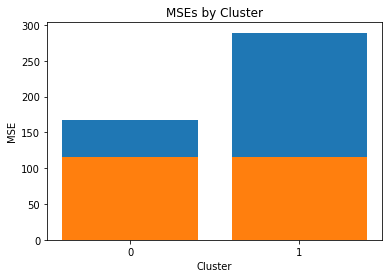

In [45]:
import numpy as np

mse_ = 116.03
mse_ = [mse_, mse_]
rmse_ = 10.77
rmse_ = [rmse_, rmse_]
mse = [mse1, mse2]
rmse = [rmse1, rmse2]

plt.bar((np.arange(0,2)).astype("int64"), mse)
plt.bar((np.arange(0,2)).astype("int64"), mse_)
plt.xticks([0, 1])
plt.xlabel("Cluster")
plt.ylabel("MSE")
plt.title("MSEs by Cluster")
plt.savefig("plots/cluster_knn_mse")